# Exploring RL Libraries
Checking out Stable-Baselines3 and Ray RLlib, running a sample script to see how they work for RL projects!

## Stable-Baselines3 DQN Sample Script
Running a DQN script from SB3 docs to train a CartPole agent. Checking rewards to see how it performs.

In [5]:
!pip install --upgrade stable-baselines3 gymnasium shimmy

import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

# Create environment
env = gym.make("CartPole-v1")

# Initialize DQN agent
model = DQN("MlpPolicy", env, verbose=1, learning_rate=0.0005, gamma=0.99)

# Train for 50,000 timesteps
model.learn(total_timesteps=50000, progress_bar=True)

# Save the model
model.save("dqn_cartpole")

# Evaluate the agent
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Mean reward: {mean_reward} +/- {std_reward}")

env.close()

Output()

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

Streaming output truncated to the last 5000 lines.
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.00482  |
|    n_updates        | 2581     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 10.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 868      |
|    fps              | 815      |
|    time_elapsed     | 12       |
|    total_timesteps  | 10467    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0149   |
|    n_updates        | 2591     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.7     |
|    ep_rew_mean      | 10.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 872      |
|   

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward: 354.0 +/- 98.84432204229033


## Plotting SB3 Rewards
Plotting rewards to see how the agent learned over time.

Streaming output truncated to the last 5000 lines.
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.031    |
|    n_updates        | 6065     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.69     |
|    ep_rew_mean      | 9.69     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2356     |
|    fps              | 844      |
|    time_elapsed     | 28       |
|    total_timesteps  | 24399    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0225   |
|    n_updates        | 6074     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.64     |
|    ep_rew_mean      | 9.64     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2360     |
|   

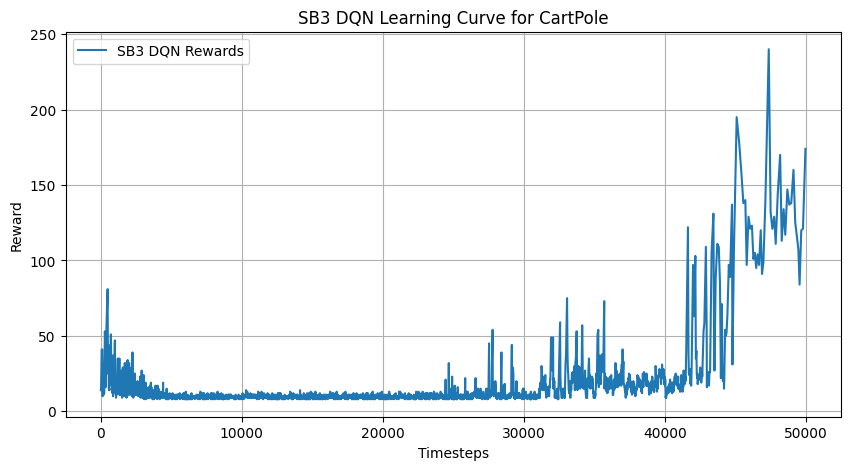

In [12]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor

# Wrap env with Monitor to save logs
env = gym.make("CartPole-v1")
env = Monitor(env, "./monitor_logs/")

# Train the model (this step must be run first)
model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=50000)
model.save("dqn_cartpole")


from stable_baselines3.common.results_plotter import load_results, ts2xy
import matplotlib.pyplot as plt

x, y = ts2xy(load_results("./monitor_logs/"), "timesteps")

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="SB3 DQN Rewards")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.title("SB3 DQN Learning Curve for CartPole")
plt.legend()
plt.grid(True)
plt.savefig("sb3_rewards.png")
plt.show()
